In [97]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 0

### a)

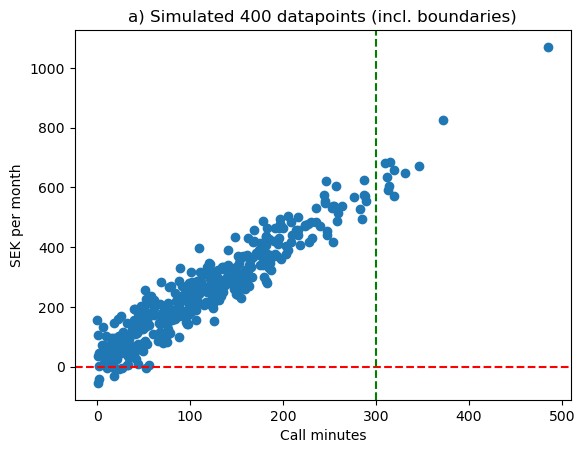

In [98]:
np.random.seed(42)
called_minutes_data = abs(np.random.normal(100, 100, 400))

noise_data = np.random.normal(0, 50, 400)

price_per_month = 2 * called_minutes_data + 25 + noise_data

plt.scatter(called_minutes_data, price_per_month)
plt.title('a) Simulated 400 datapoints (incl. boundaries)')
plt.xlabel('Call minutes')
plt.ylabel('SEK per month')
plt.axhline(0,  linestyle='--', color='red')
plt.axvline(300, linestyle='--', color='green')

### b)

Text(0, 0.5, 'SEK per month')

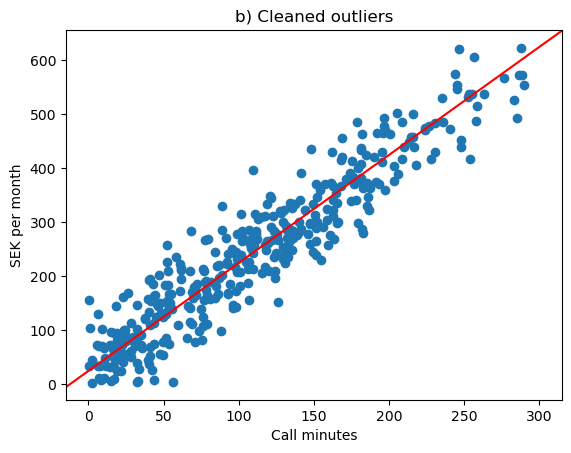

In [99]:
np.random.seed(42)

filtered_data = (called_minutes_data <= 300) & (price_per_month >= 0)
filter_x = called_minutes_data[filtered_data]
filter_y = price_per_month[filtered_data]

beta_0 = 25
beta_1 = 2

plt.scatter(filter_x, filter_y)
plt.axline((0, beta_0), (300, beta_0 + beta_1 * 300), color='red')
plt.title('b) Cleaned outliers')
plt.xlabel('Call minutes')
plt.ylabel('SEK per month')

### c)

In [100]:
df = pd.DataFrame({'Call minutes': filter_x, 'SEK per month': filter_y})
df

,Call minutes,SEK per month
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
...,...,...
376,53.082435,183.822512
377,71.313453,165.649148
378,235.387237,529.849510
379,88.546015,203.507950


# Exercise 1

### a)

In [101]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7, random_state=42, replace=False):
    np.random.seed(random_state)
    n = len(X)
    n_train = int(n * train_fraction)
    n_test = n - n_train
    indices = np.random.permutation(n)
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    return X_train, X_test, y_train, y_test




### b)

In [102]:
X = df[['Call minutes']]
y = df['SEK per month']
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

266
266
115
115


# Exercise 2

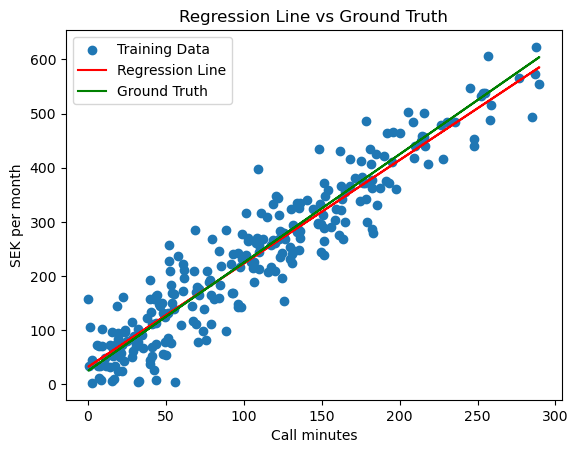

In [103]:
# Calculate the coefficients using the normal equation
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_train = np.insert(X_train, 0, 1, axis=1)  # Add a column of ones for the intercept term
beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Plot the regression line, ground truth, and training data
plt.scatter(X_train[:, 1], y_train, label='Training Data')
plt.plot(X_train[:, 1], X_train @ beta_hat, color='red', label='Regression Line')
plt.plot(X_train[:, 1], beta_0 + beta_1 * X_train[:, 1], color='green', label='Ground Truth')
plt.title('Regression Line vs Ground Truth')
plt.xlabel('Call minutes')
plt.ylabel('SEK per month')
plt.legend()
plt.show()


# Exercise 3

### a)

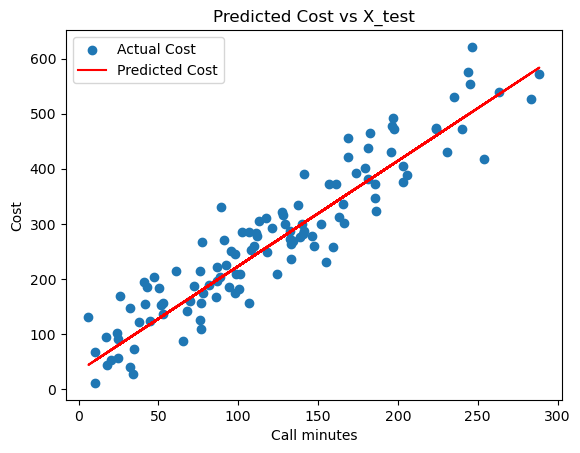

In [104]:
# Make predictions on testing data
X_test = X_test.values.reshape(-1, 1)
X_test = np.insert(X_test, 0, 1, axis=1)  # Add a column of ones for the intercept term
y_pred = X_test @ beta_hat

# Plot the predicted cost against X_test
plt.scatter(X_test[:, 1], y_test, label='Actual Cost')
plt.plot(X_test[:, 1], y_pred, color='red', label='Predicted Cost')
plt.title('Predicted Cost vs X_test')
plt.xlabel('Call minutes')
plt.ylabel('Cost')
plt.legend()
plt.show()


### b)

In [111]:
# Calculate MAE
mae = np.mean(np.abs(y_test.values.flatten() - y_pred.flatten()))

# Calculate MSE
mse = np.mean((y_test.values.flatten() - y_pred.flatten()) ** 2)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'MAE: {mae:.2f}kr')
print(f'MSE: {mse:.2f}kr^2')
print(f'RMSE: {rmse:.2f}kr')


MAE: 40.12kr
MSE: 2401.58kr^2
RMSE: 49.01kr


# Exercise 4

### a)

In [170]:
np.random.seed(42)

mean_start_cost = 25
mean_cost_per_minute = 2
mean_cost_per_sms = 0.5
mean_cost_per_GB = 50

x_1 = abs(np.random.normal(100, 100, 10000))
x_2 = np.random.uniform(0, 10, 10000)
x_3 = abs(np.random.normal(0, 2, 10000))
epsilon = np.random.normal(0, 50, 10000)

y = mean_start_cost + mean_cost_per_minute * x_1 + mean_cost_per_sms * x_2 + mean_cost_per_GB * x_3 + epsilon

something = pd.DataFrame({'Minutes': x_1, 'SMS': x_2, 'Surf (GB)': x_3, 'Cost': y})
something.insert(0, 'Intercept', 1)
something

,Intercept,Minutes,SMS,Surf (GB),Cost
0,1,149.671415,3.212552,0.958919,390.837402
1,1,86.173570,1.030192,2.056136,280.825010
2,1,164.768854,0.718075,1.004004,457.139611
3,1,252.302986,0.942760,3.413725,663.885559
4,1,76.584663,5.828694,0.535679,142.958014
...,...,...,...,...,...
9995,1,230.110206,6.829378,1.174038,539.125019
9996,1,99.834497,8.499114,2.401046,417.933331
9997,1,29.468328,2.157235,1.145467,113.513913
9998,1,149.576557,7.538263,1.013816,442.956662


### b)

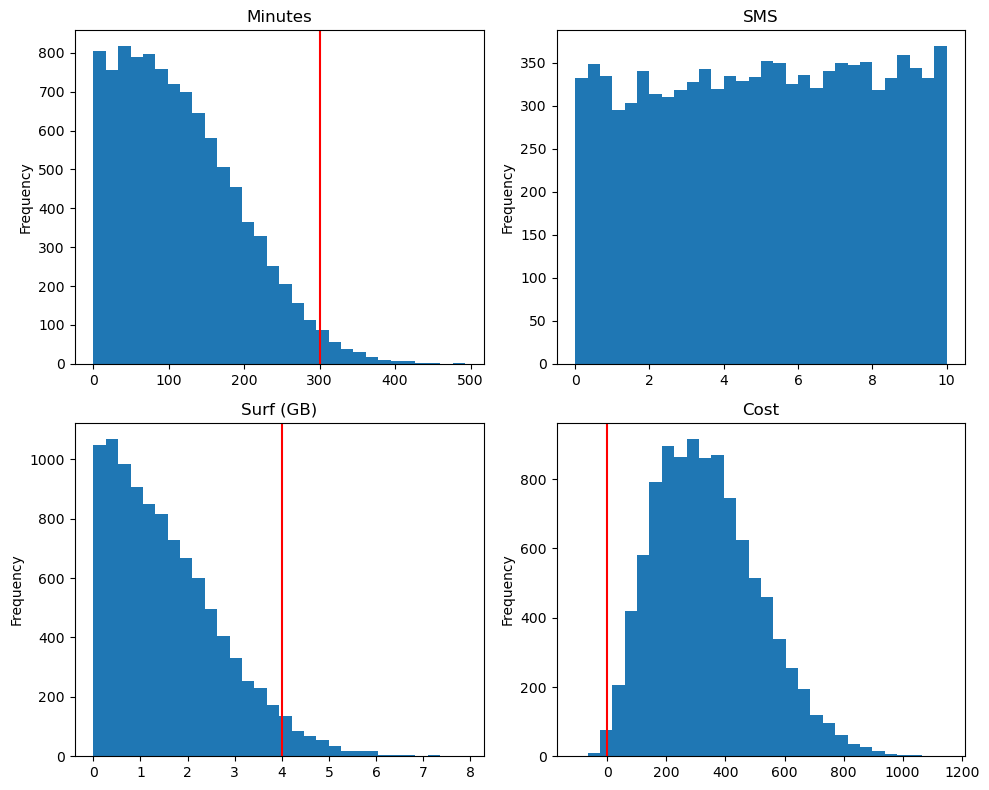

In [206]:
# Create subplots for each variable
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histogram for x_1
axs[0, 0].hist(something['Minutes'], bins=30)
axs[0, 0].set_title('Minutes')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].axvline(300, color='red')

# Plot histogram for x_2
axs[0, 1].hist(something['SMS'], bins=30)
axs[0, 1].set_title('SMS')
axs[0, 1].set_ylabel('Frequency')

# Plot histogram for x_3
axs[1, 0].hist(something['Surf (GB)'], bins=30)
axs[1, 0].set_title('Surf (GB)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].axvline(4, color='red')

# Plot histogram for y
axs[1, 1].hist(something['Cost'], bins=30)
axs[1, 1].set_title('Cost')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].axvline(0, color='red')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### c)

In [199]:
cleaned_data = something[(something['Surf (GB)'] < 4) & (something['Minutes'] < 300) & (something['Cost'] > 0)]
cleaned_data


,Intercept,Minutes,SMS,Surf (GB),Cost
0,1,149.671415,3.212552,0.958919,390.837402
1,1,86.173570,1.030192,2.056136,280.825010
2,1,164.768854,0.718075,1.004004,457.139611
3,1,252.302986,0.942760,3.413725,663.885559
4,1,76.584663,5.828694,0.535679,142.958014
...,...,...,...,...,...
9995,1,230.110206,6.829378,1.174038,539.125019
9996,1,99.834497,8.499114,2.401046,417.933331
9997,1,29.468328,2.157235,1.145467,113.513913
9998,1,149.576557,7.538263,1.013816,442.956662


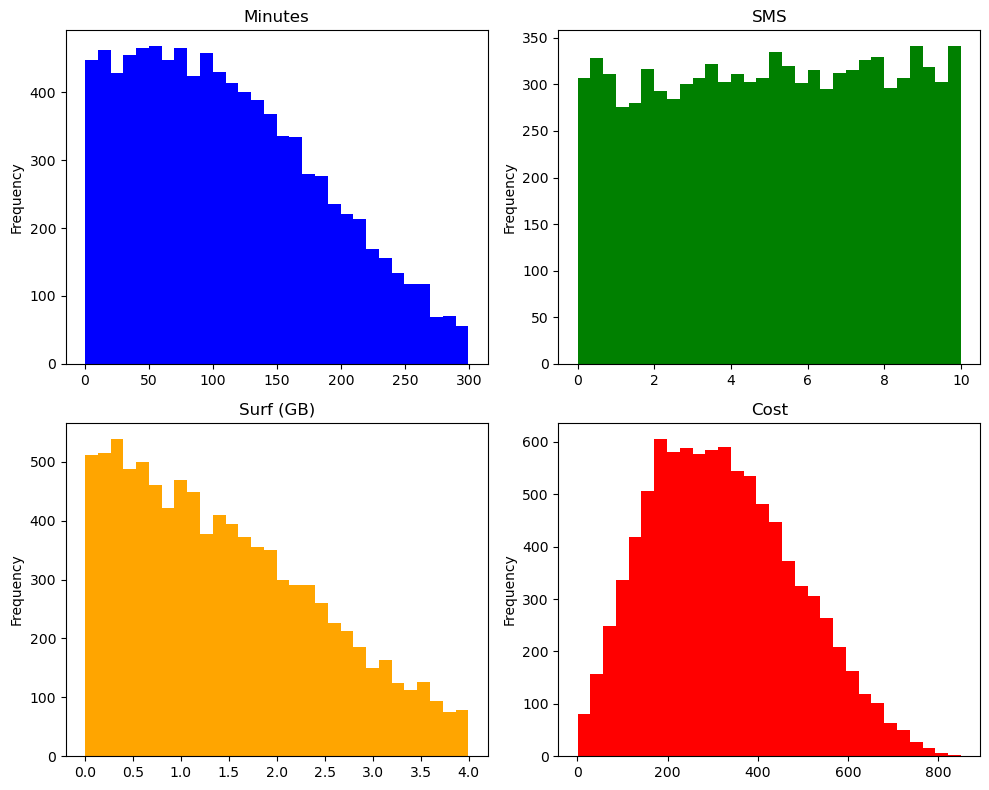

In [207]:
# Create subplots for each variable
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histogram for x_1 (Minutes)
axs[0, 0].hist(cleaned_data['Minutes'], bins=30, color='blue')
axs[0, 0].set_title('Minutes')
axs[0, 0].set_ylabel('Frequency')

# Plot histogram for x_2 (SMS)
axs[0, 1].hist(cleaned_data['SMS'], bins=30, color='green')
axs[0, 1].set_title('SMS')
axs[0, 1].set_ylabel('Frequency')

# Plot histogram for x_3 (Surf (GB))
axs[1, 0].hist(cleaned_data['Surf (GB)'], bins=30, color='orange')
axs[1, 0].set_title('Surf (GB)')
axs[1, 0].set_ylabel('Frequency')

# Plot histogram for y (Cost)
axs[1, 1].hist(cleaned_data['Cost'], bins=30, color='red')
axs[1, 1].set_title('Cost')
axs[1, 1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Exercise 5

### a)